# Exercise: House price prediction
    
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



Dataset: https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv

Build a predictive model using SalesPrice as the outcome variable and the rest as predicter variables.

Find rmse and r2 score for training and test dataset. 



In [2]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")
del df["Id"]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [9]:
df = df[~np.isnan(df.SalesPrice)]
df.shape

(1460, 79)

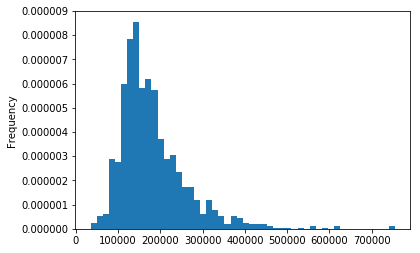

In [12]:
target = "SalesPrice"
df[target].plot.hist(bins = 50, normed = True)
target_mean = df[target].mean()
#plt.plot([target_mean, target_mean], [0, 1.0])

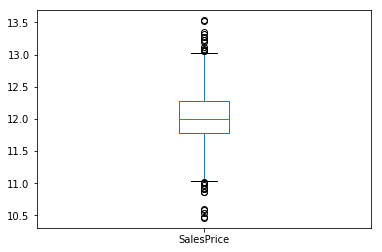

In [14]:
np.log(df[target]).plot.box()

In [16]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.007406285347507605 
test mse 8.727385076639865e+19 
training R2 0.9494616956035435 
test R2 -4.617920804724029e+20


In [23]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.01))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.01552703945002047 
test mse 0.022954852934347732 
training R2 0.8940480673803641 
test R2 0.8785389987905549


In [24]:
est = pipe.steps[-1][-1]
est.coef_

array([-0.01496146, -0.        ,  0.01185919,  0.10413487,  0.02330874,
        0.02946514,  0.02171262,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.00472336,  0.00772163,  0.        , -0.        ,
        0.09556319,  0.01803006,  0.        ,  0.01199834,  0.        ,
        0.        , -0.00227499,  0.01120831,  0.00815855,  0.        ,
        0.05589592,  0.        ,  0.01084966,  0.00460384,  0.        ,
        0.        ,  0.00599374, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.02643172,
        0.        ,  0.        ,  0.        ,  0.        , -0.00044357,
       -0.00159326,  0.        ,  0.        ,  0.        ,  0.00751756,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.00283564,  0.        ,
        0.01948933, -0.00664952, -0.        , -0.        , -0.00036926,
       -0.        , -0.        , -0.        , -0.        ,  0.00

# Feature selection using Lasso

In [29]:
pd.DataFrame({"feature": X.columns, "coef": est.coef_}).query("coef != 0").shape

(59, 2)

In [35]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Ridge(alpha=200))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.010607647895419826 
test mse 0.02330753065855508 
training R2 0.9276165428260786 
test R2 0.8766728753346996


In [38]:
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": X.columns, "coef": est.coef_}).query("coef != 0").shape

(252, 2)

In [40]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet(alpha=0.1, l1_ratio=0.8))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.041780619919859034 
test mse 0.0528172686757092 
training R2 0.7149013860108608 
test R2 0.7205280141481248


In [59]:
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 12345)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=0.1, l1_ratio=0.8, max_iter=1000))
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (1022, 258) X_test (438, 258)

training mse 0.01039365733578152 
test mse 0.02092071035162678 
training R2 0.9372679147190192 
test R2 0.854307563876315


In [43]:
import sklearn

In [44]:
sklearn.__version__

'0.19.1'

In [51]:
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=5, scoring=)

In [52]:
np.mean(scores)

0.8227322157423643

In [53]:
scores

array([0.88019564, 0.89871816, 0.5567191 , 0.8984765 , 0.87955169])

In [69]:
%%time 

y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 12345)
print("X_train", X_train.shape, "X_test", X_test.shape)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(alpha=0.1, l1_ratio=0.8, max_iter=1000))
])

param_grid = {
    "est__alpha": 10 ** np.linspace(-3, 2, 5),
    "est__l1_ratio": np.linspace(0.01, 0.99, 5)
}
gsearch = model_selection.GridSearchCV(cv=5, estimator=pipe, n_jobs=4, param_grid=param_grid)
gsearch.fit(X_train, y_train)

print("Test score using the best model", gsearch.best_estimator_.score(X_test, y_test))
print("Best params", gsearch.best_params_, 
      "best training score (cv): ", gsearch.best_score_)

X_train (1022, 258) X_test (438, 258)
Test score using the best model 0.8595836195885161
Best params {'est__alpha': 0.31622776601683794, 'est__l1_ratio': 0.255} best training score (cv):  0.8338600844256684
CPU times: user 1.35 s, sys: 187 ms, total: 1.54 s
Wall time: 35.2 s


In [65]:
gsearch.best_score_

0.8334790124299282

In [66]:
gsearch.best_params_

{'est__alpha': 0.31622776601683794, 'est__l1_ratio': 0.255}

In [68]:
gsearch.best_estimator_.score(X_test, y_test)

0.8571026651822644

In [60]:
np.linspace(-3, 2, 10)

array([-3.        , -2.44444444, -1.88888889, -1.33333333, -0.77777778,
       -0.22222222,  0.33333333,  0.88888889,  1.44444444,  2.        ])

In [61]:
10 ** np.linspace(-3, 2, 10)

array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02])

In [71]:
import pickle

pickle.dump?

In [72]:
with open("house_prediction.model", "wb") as f:
    pickle.dump(gsearch.best_estimator_, f)

In [73]:
with open("house_prediction.model", "rb") as f:
    est = pickle.load(f)

In [75]:
est.score(X_test, y_test)

0.8595836195885161

In [76]:
est.predict(X_test)

array([11.70766705, 11.69108855, 11.61660624, 11.52927515, 12.46099567,
       12.46835066, 11.52860571, 11.82698367, 12.03927761, 12.20369974,
       12.76958989, 11.94271084, 11.13613563, 12.26675194, 11.72924905,
       11.85973286, 12.29832348, 12.62449225, 12.04599283, 12.12192543,
       11.77023209, 12.79021844, 12.01848102, 11.90486103, 11.9101601 ,
       12.12642143, 11.67730059, 12.37717172, 12.30793204, 11.83878192,
       11.95871726, 11.97024383, 12.08417839, 11.97513144, 12.49988231,
       12.22583501, 11.93606741, 11.92969418, 12.52710839, 12.39929793,
       11.82079054, 12.44227541, 11.99010971, 11.98231189, 12.44211414,
       11.92151686, 12.31915682, 12.1122808 , 11.77827702, 11.53220959,
       11.65416027, 12.20596328, 11.81924536, 12.03366977, 12.23663992,
       11.49832408, 11.55523801, 12.2546981 , 12.21407851, 12.35950985,
       12.22311022, 11.75265544, 11.90149198, 11.71426494, 12.2201259 ,
       12.46716135, 12.17964902, 12.0847182 , 11.90023366, 12.36